# Intracellular protein analysis: HemeThrombKG/HemeKG 2.0 - pathway overlay

This notebook overlays intracellular nodes from HemeThrombKG/HemeKG 2.0 and coagulation pathways.

In [1]:
import json
import pybel
import pandas as pd
import urllib.request

import igraph

from network_utils import get_bel_graph, overlay_graphs

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/autonotebook/__init__.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  warn("Using `tqdm.autonotebook.tqdm` in notebook mode."


In [2]:
pybel.get_version()

'0.15.5'

### Load HemeThrombKG

In [3]:
review_kg = pybel.from_bel_script('../bel_files/hemeThrombKG.bel')

### Load hemeKG

In [4]:
with urllib.request.urlopen('https://raw.githubusercontent.com/hemekg/hemekg/master/hemekg/_cache.bel.nodelink.json') as url:
    data = json.loads(url.read().decode())
    
    heme_kg = pybel.from_nodelink(data)
    

### Load pathways

In [5]:
coagulation_pathway = get_bel_graph('coagulation_pathways')
common_pathway = get_bel_graph('common_pathway_reactome')
kegg_pathway = get_bel_graph('platelet_activation_kegg')
plug_pathway = get_bel_graph('plug_formation_reactome')

### Load intracellular proteins

In [6]:
ic_proteins_df = pd.read_csv('../node_type_files/intracellular_proteins.tsv', sep='\t', header=None)
db_proteins = ic_proteins_df[0].to_list()

### Merge graphs with HemeThrombKG

In [7]:
# Merge review and coagulation graph
review_coagulation_graph = pybel.union([review_kg, coagulation_pathway])

# Merge review and common pathway graph
review_common_graph = pybel.union([review_kg, common_pathway])

# Merge review and kegg pathway graph
review_kegg_graph = pybel.union([review_kg, kegg_pathway])

# Merge review and plug pathway graph
review_plug_graph = pybel.union([review_kg, plug_pathway])


### Merge graphs with hemeKG 2.0

In [8]:
# Merge reviewKG and hemeKG graph
heme_kg_v2 = pybel.union([review_kg, heme_kg])

# Merge hemeKG 2.0 and coagulation graph
merged_coagulation_graph = pybel.union([heme_kg_v2, coagulation_pathway])

# Merge hemeKG 2.0 and common pathway graph
merged_common_graph = pybel.union([heme_kg_v2, common_pathway])

# Merge hemeKG 2.0 and kegg pathway graph
merged_kegg_graph = pybel.union([heme_kg_v2, kegg_pathway])

# Merge hemeKG 2.0 and plug pathway graph
merged_plug_graph = pybel.union([heme_kg_v2, plug_pathway])


## Render graphs

### Merged coagulation pathways - HemeThrombKG

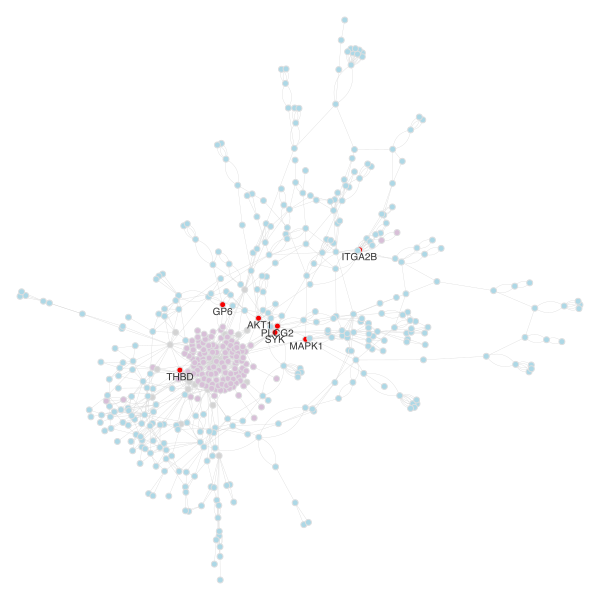

In [9]:
coagulation_graph, visual_style = overlay_graphs(
    review_coagulation_graph, 
    coagulation_pathway, 
    review_kg,
    db_proteins,
)

layout = coagulation_graph.layout("fr")
igraph.plot(coagulation_graph, layout=layout, **visual_style)

### Merged coagulation pathways -  hemeKG 2.0

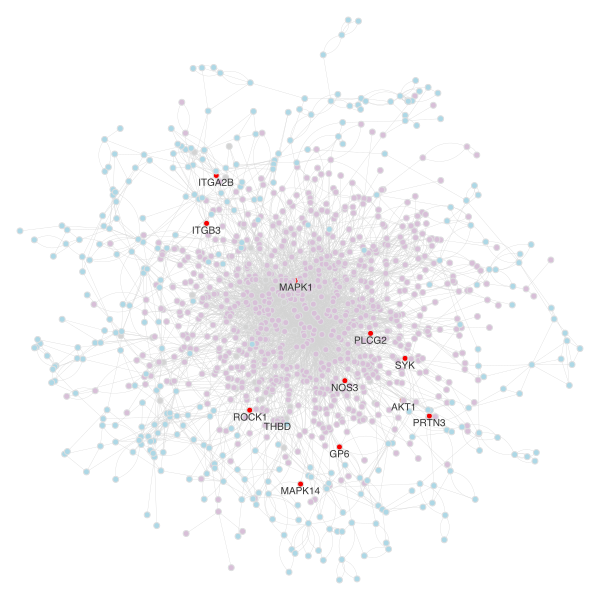

In [10]:
heme_kg_v2_coagulation_graph, visual_style = overlay_graphs(
    merged_coagulation_graph, 
    coagulation_pathway, 
    heme_kg_v2,
    db_proteins,
)

layout = heme_kg_v2_coagulation_graph.layout("fr")
igraph.plot(heme_kg_v2_coagulation_graph, layout=layout, **visual_style)

### KEGG pathway - HemeThrombKG 

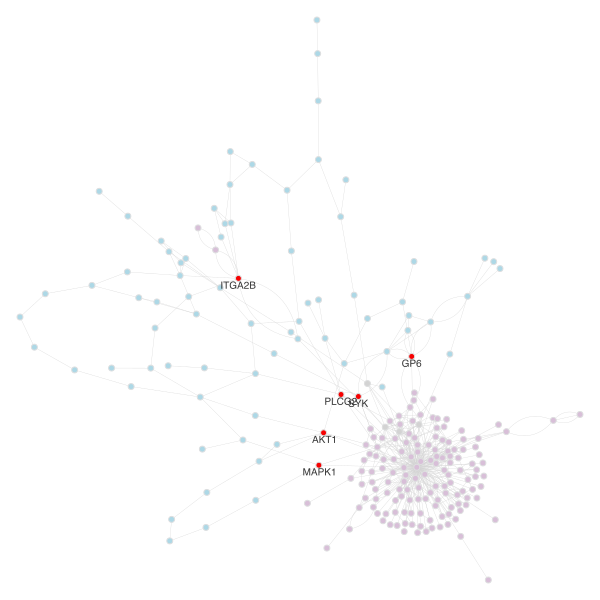

In [11]:
kegg_graph, visual_style = overlay_graphs(
    review_kegg_graph, 
    kegg_pathway, 
    review_kg,
    db_proteins,
)

layout = kegg_graph.layout("fr")
igraph.plot(kegg_graph, layout=layout, **visual_style)

### KEGG pathway -  hemeKG 2.0

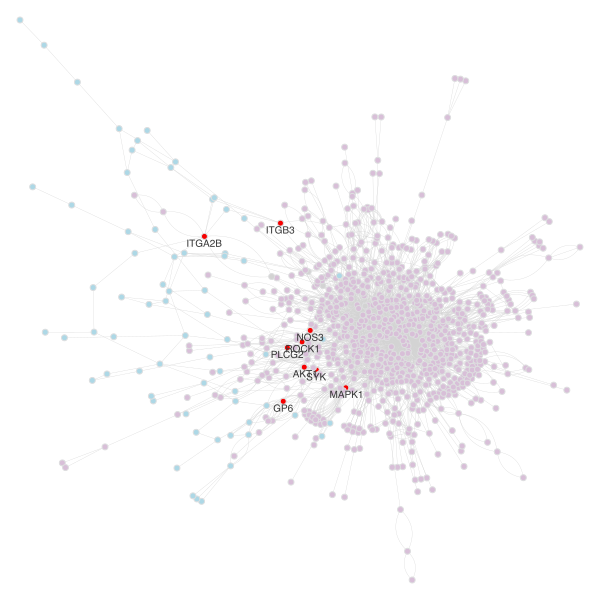

In [12]:
heme_kg_v2_kegg_graph, visual_style = overlay_graphs(
    merged_kegg_graph, 
    kegg_pathway, 
    heme_kg_v2,
    db_proteins,
)

layout = heme_kg_v2_kegg_graph.layout("fr")
igraph.plot(heme_kg_v2_kegg_graph, layout=layout, **visual_style)

### Common pathway - HemeThrombKG

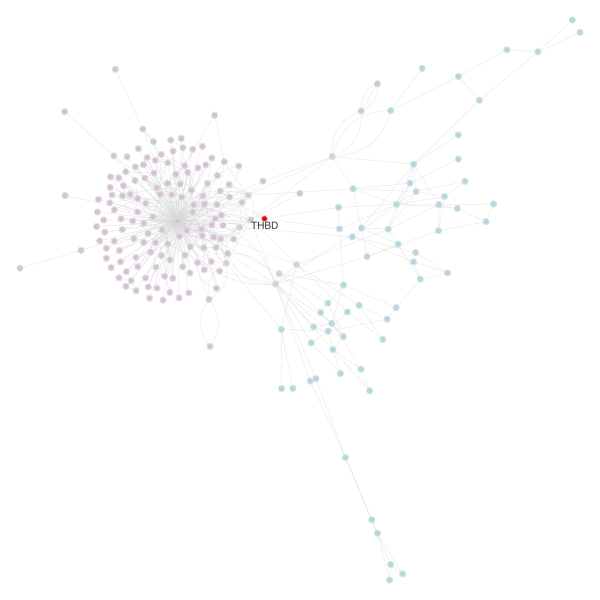

In [13]:
common_graph, visual_style = overlay_graphs(
    review_common_graph, 
    common_pathway, 
    review_kg,
    db_proteins,
)

layout = common_graph.layout("fr")
igraph.plot(common_graph, layout=layout, **visual_style)

### Common pathway - hemeKG 2.0

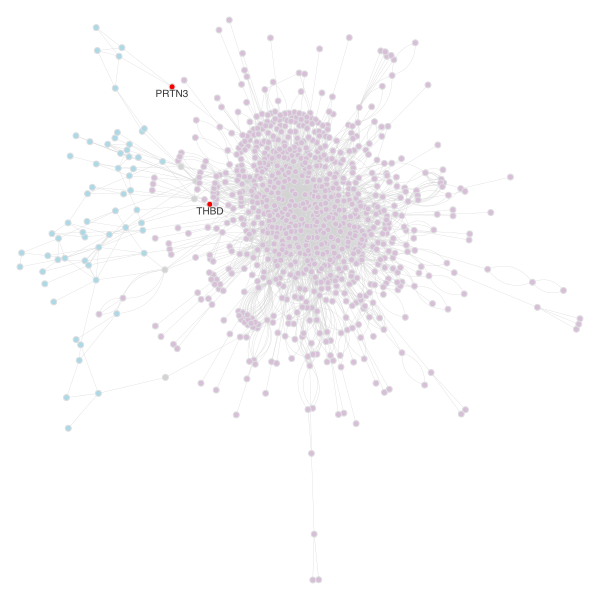

In [14]:
heme_kg_v2_common_graph, visual_style = overlay_graphs(
    merged_common_graph, 
    common_pathway, 
    heme_kg_v2,
    db_proteins,
)

layout = heme_kg_v2_common_graph.layout("fr")
igraph.plot(heme_kg_v2_common_graph, layout=layout, **visual_style)